In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree



In [2]:
# read the file from a filepath to its csv into a dataframe
file_path_train = r"/Users/anjanapro/Desktop/machine learning/flight_delay_prediction/notebooks/clf_train_data.csv"
file_path_test = r"/Users/anjanapro/Desktop/machine learning/flight_delay_prediction/notebooks/clf_test_data.csv"
df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

In [3]:
# assuming 'ArrDel15' is the target variable
X_train = df_train.drop('ArrDel15', axis=1) 
y_train = df_train['ArrDel15']  

X_test = df_test.drop('ArrDel15', axis=1) 
y_test = df_test['ArrDel15']  

In [4]:
# helper function that creates a classfier using the gini index crierion
def train_using_gini(X_train, y_train, depth):
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=depth, min_samples_leaf=5)
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [5]:
# helper function that creates a classifier using entropy as a dividing criterion
def train_using_entropy(X_train, y_train, depth):
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=depth, min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [6]:
# using a provided model, it will make a predition on the testing data
# returns an array of predicted labels, given testing tuples and the trained decision tree model
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred

In [7]:
# calculates accuracy, confusion matrix (true positive count, true negative count, FP, and FN), and classification report 
def cal_accuracy(y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:\n", accuracy_score(y_test, y_pred) * 100)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred) * 100





In [8]:
# function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15,10))
    tree.plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

In [10]:

max_depth = [7,8,9,10,11,12]

max_accuracy = -1
best_depth = 0
best_model = ""

for depth in max_depth:
    clf_gini = train_using_gini(X_train, y_train, depth)
    clf_entropy = train_using_entropy(X_train, y_train, depth)

    pred_gini  = prediction(X_test, clf_gini)
    pred_entropy = prediction(X_test, clf_entropy)

    print("Gini index criterion accuracy evalution at max_depth:", depth)
    gini_acc = cal_accuracy(y_test, pred_gini)

    if (max_accuracy < gini_acc):
        max_accuracy = gini_acc
        best_depth = depth
        best_model = "gini"

    print("Information gain criterion accuracy evaluation at max_depth:", depth)
    cal_accuracy(y_test, pred_entropy)
    entropy_acc = cal_accuracy(y_test, pred_entropy)

    if (max_accuracy < entropy_acc):
        max_accuracy = entropy_acc
        best_depth = depth
        best_model = "information gain"


print("best model:", best_model)
print("best depth:", best_depth)
print("max accuracy:", max_accuracy)  




Gini index criterion accuracy evalution at max_depth: 7
Confusion matrix:
 [[ 82660  57058]
 [ 12483 218087]]
Accuracy:
 81.21975327312795
Classification Report:
               precision    recall  f1-score   support

     Delayed       0.87      0.59      0.70    139718
 Not Delayed       0.79      0.95      0.86    230570

    accuracy                           0.81    370288
   macro avg       0.83      0.77      0.78    370288
weighted avg       0.82      0.81      0.80    370288

Information gain criterion accuracy evaluation at max_depth: 7
Confusion matrix:
 [[ 83332  56386]
 [ 13160 217410]]
Accuracy:
 81.21840297282115
Classification Report:
               precision    recall  f1-score   support

     Delayed       0.86      0.60      0.71    139718
 Not Delayed       0.79      0.94      0.86    230570

    accuracy                           0.81    370288
   macro avg       0.83      0.77      0.78    370288
weighted avg       0.82      0.81      0.80    370288

Confusion mat

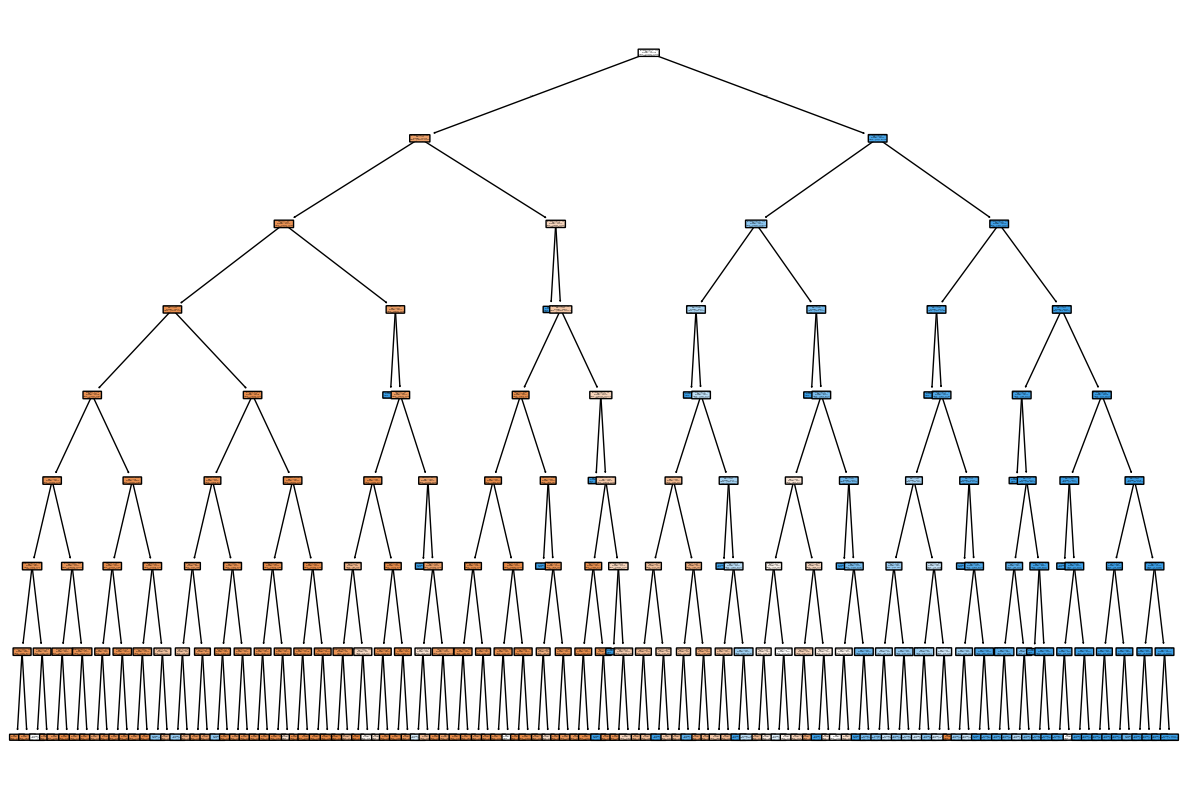

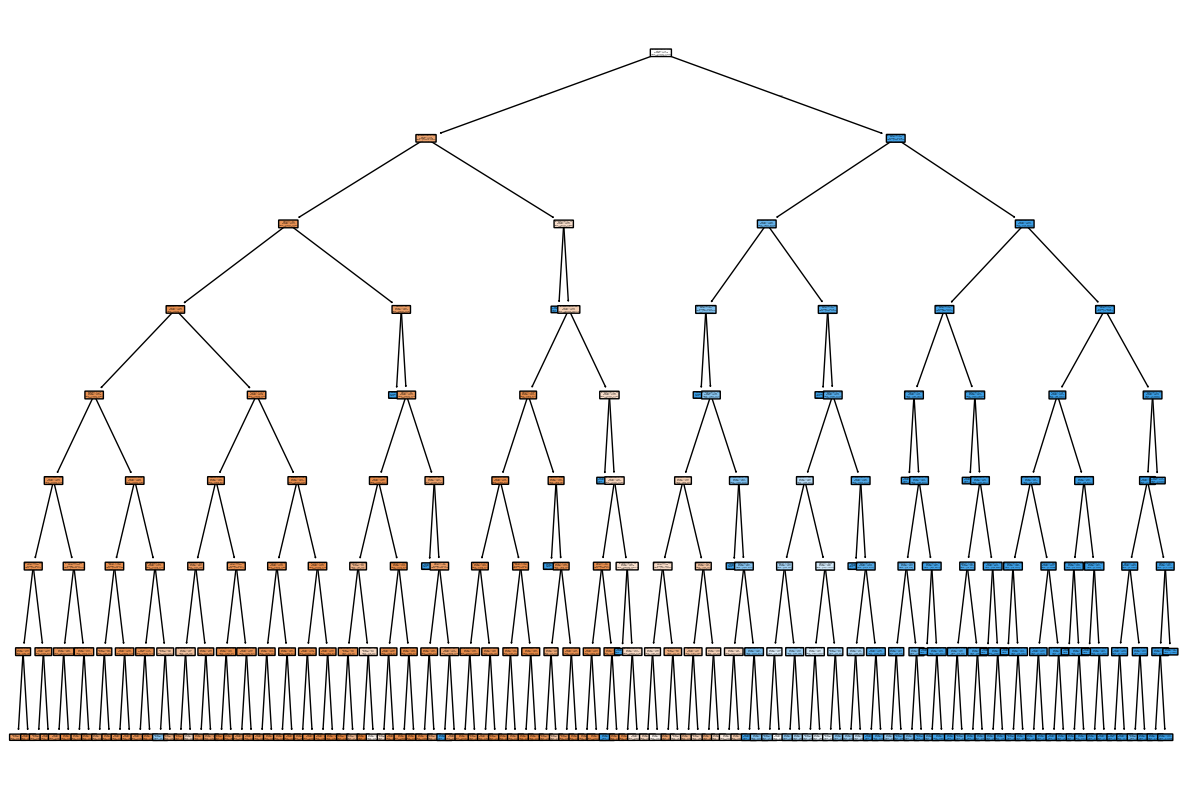

In [9]:
feature_names = ["windspeedKmph", "winddirDegree", "precipMM", "visibility", "pressure", "cloudcover", "DewPointF", "WindGustKmph", "tempF", "WindChillF", "humidity", "DepDelayMinutes"]
class_names = ["Delayed", "Not Delayed"]

clf_gini = train_using_gini(X_train, y_train, best_depth)
pred_gini  = prediction(X_test, clf_gini)
clf_entropy = train_using_entropy(X_train, y_train, best_depth)
pred_entropy  = prediction(X_test, clf_gini)

# Visualize Gini model decision tree
plot_decision_tree(clf_gini, feature_names, class_names)  

# Visualize Entropy model decision tree
plot_decision_tree(clf_entropy, feature_names, class_names)